# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [147]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [148]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [149]:
heroes_df = heroes_df.drop('Unnamed: 0', axis=1)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [150]:
print(powers_df.info())
powers_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
None


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________
## Heroes_df Data Strategies

Duplicate Data - I will drop the duplicate data presented as 

Publisher Data (15 NaN) - Missing data will be asigned as "Unknown".  Catagorical data can be more challenging to replace though I feel that there may be value in assigning a new catagory here.  Perhaps we can use other features to predict which publisher a particular hero may belong to?

Gender Data (29 counts of '-') - Small number of missing data, drop rows.

Race (304 counts of '-') - Not enough data, missing nearly 50%, drop column.

Skin color (662 counts of '-') - Not enough data, missing over 80%, drop column.

Alignment (7 counts of '-') -  Small number of missing data, drop rows.

**The following 4 feature data will be addressed by seperateing the heroes_df into two dataframes and interpolating based on relative proportions per gender.**

**Weight Data (237 counts of -99) + Height Data (217 counts of -99) + Eye Color Data (172 counts of '-') + Hair color (172 counts of '-')**

## Powers_df Strategies

The data for this dataframe is composed of boolean values except for the first feature 'name'.  I will join this in later on using the name as the index.

In [151]:
heroes_df.drop_duplicates(subset='name', inplace=True)

In [152]:
heroes_df.drop(['Race', 'Skin color'], axis=1, inplace=True)
heroes_df

,name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Black,-99.0,Marvel Comics,bad,-99.0
...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Strawberry Blond,165.0,Marvel Comics,good,52.0
730,Ymir,Male,white,No Hair,304.8,Marvel Comics,good,-99.0
731,Yoda,Male,brown,White,66.0,George Lucas,good,17.0
732,Zatanna,Female,blue,Black,170.0,DC Comics,good,57.0


In [153]:
heroes_df = heroes_df[heroes_df['Gender'] != '-']
heroes_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [154]:
heroes_df = heroes_df[heroes_df['Alignment'] != '-']
heroes_df['Alignment'].unique()

array(['good', 'bad', 'neutral'], dtype=object)

In [155]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [156]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Hair color     0
Height         0
Publisher     12
Alignment      0
Weight         1
dtype: int64

## First we will address the missing Publisher data

In [157]:
heroes_df['Publisher'].isna().sum()

12

In [158]:
print(heroes_df['Publisher'].unique(), '\n')
print(heroes_df['Publisher'].describe(), '\n')
print(heroes_df['Publisher'].value_counts(), '\n')

['Marvel Comics' 'Dark Horse Comics' 'DC Comics' 'NBC - Heroes'
 'Wildstorm' 'Image Comics' nan 'Icon Comics' 'SyFy' 'Hanna-Barbera'
 'George Lucas' 'Team Epic TV' 'South Park' 'HarperCollins' 'ABC Studios'
 'Universal Studios' 'Star Trek' 'IDW Publishing' 'Shueisha'
 'Sony Pictures' 'J. K. Rowling' 'Titan Books' 'Rebellion' 'Microsoft'
 'J. R. R. Tolkien'] 

count               669
unique               24
top       Marvel Comics
freq                352
Name: Publisher, dtype: object 

Marvel Comics        352
DC Comics            204
NBC - Heroes          19
Dark Horse Comics     17
George Lucas          14
Image Comics          13
HarperCollins          6
Star Trek              5
Team Epic TV           5
SyFy                   5
Shueisha               4
Icon Comics            4
IDW Publishing         4
ABC Studios            4
Wildstorm              3
Sony Pictures          2
Titan Books            1
Microsoft              1
Hanna-Barbera          1
Universal Studios      1
J. R. R. 

Only 1% of the records are missing from the 'Publisher' feature. 

Therefore I will replace them as 'Unknown'. 

I feel that this missing feature data cannot be assumed and is therefore relevant and worth keeping.



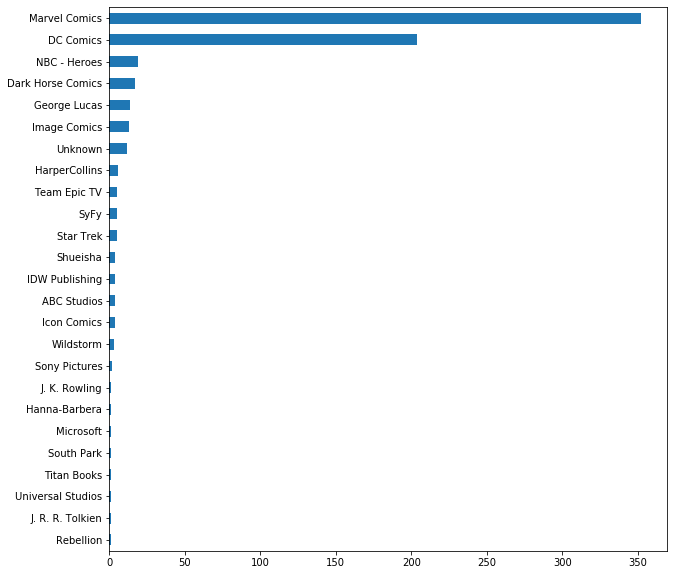

In [159]:
print('Only {}% of the records are missing from the \'Publisher\' feature. \n\nTherefore I will replace them as \'Unknown\'. \n\nI feel that this missing feature data cannot be assumed and is therefore relevant and worth keeping.\n'
      .format(int((heroes_df['Publisher'].isna().sum()/len(heroes_df['Publisher']))*100)))
heroes_df['Publisher'].fillna('Unknown', inplace=True)
heroes_df['Publisher'].value_counts().sort_values().plot.barh(figsize=(10,10));

## Next we will address the missing Weight data by Gender, starting with Males.

In [160]:
male_heroes = heroes_df[heroes_df['Gender'] == 'Male']
male_heroes

,name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Black,-99.0,Marvel Comics,bad,-99.0
5,Absorbing Man,Male,blue,No Hair,193.0,Marvel Comics,bad,122.0
6,Adam Monroe,Male,blue,Blond,-99.0,NBC - Heroes,good,-99.0
7,Adam Strange,Male,blue,Blond,185.0,DC Comics,good,88.0
9,Agent Bob,Male,brown,Brown,178.0,Marvel Comics,good,81.0
10,Agent Zero,Male,-,-,191.0,Marvel Comics,good,104.0


In [161]:
print(len(male_heroes['Weight'].value_counts()), '\n')
print(male_heroes['Weight'].describe(), '\n')

112 

count    484.000000
mean      53.727273
std      139.530787
min      -99.000000
25%      -99.000000
50%       79.000000
75%      101.000000
max      900.000000
Name: Weight, dtype: float64 



In [162]:
male_heroes[(male_heroes['Weight'] > 0)
            &
            (male_heroes['Weight']<= male_heroes['Weight'].quantile(.90))]['Weight'].describe()


count    281.000000
mean      90.174377
std       30.569035
min        2.000000
25%       77.000000
50%       86.000000
75%      101.000000
max      180.000000
Name: Weight, dtype: float64

**This seems like a more reasonable distribution, let's get rid of the rows with heroes weight > 90th percentile before we proceed. We will do the same for the height as well and repeat for the female heroes.**

485
434


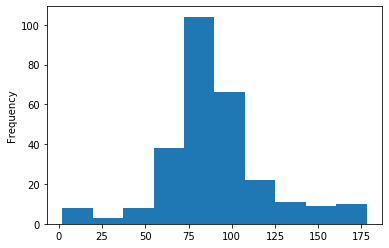

In [163]:
print(len(male_heroes))
male_heroes = male_heroes[male_heroes['Weight'] < male_heroes['Weight'].quantile(.9)]
print(len(male_heroes))
male_heroes[male_heroes['Weight'] > 0]['Weight'].plot.hist();

**Soas you can see above we lost about 50 rows, acceptable considering the circumstances I think.**

In [164]:
print(male_heroes['Weight'].describe())

count    434.000000
mean      22.198157
std       93.520779
min      -99.000000
25%      -99.000000
50%       74.000000
75%       90.000000
max      178.000000
Name: Weight, dtype: float64


**Let's see how this column changes after we interpolate the weights!**

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


count    434.000000
mean      90.057604
std       29.776906
min        2.000000
25%       77.000000
50%       86.000000
75%      101.000000
max      178.000000
Name: Weight, dtype: float64
0


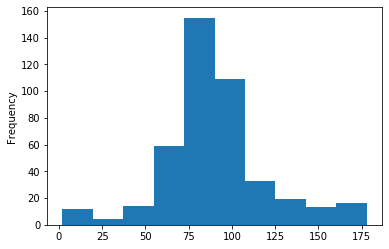

In [165]:
real_male_weights_list = male_heroes[male_heroes['Weight'] > 0]['Weight']

rel_male_weights_prob = real_male_weights_list.value_counts(normalize=True)

def male_weight_list_fixer(weight):
        if weight < 0:
            return np.random.choice(rel_male_weights_prob.keys(), p=rel_male_weights_prob)
        else:
            return weight

male_heroes['Weight'] = male_heroes['Weight'].map(lambda x: male_weight_list_fixer(x))
print(male_heroes['Weight'].describe())
print(male_heroes['Weight'].isna().sum())
male_heroes['Weight'].plot.hist();

In [166]:
# There still seemed to be 1 record with a NaN value, lets just drop it here.
heroes_df = heroes_df.dropna(subset=['Weight'])
print(heroes_df['Weight'].isna().sum())

0


**This looks much better! Lets do the same analysis for the height next!  This time however, we shouldnt need to drop as many outliers as it is likely that the heroes with the outlying weight had a similarly large height, lets see!**

## Next we will address the missing Height data by Gender, starting with Males.

In [167]:
print(len(male_heroes['Height'].value_counts()), '\n')
print(male_heroes['Height'].describe(), '\n')

43 

count    434.000000
mean      97.095622
std      146.881457
min      -99.000000
25%      -99.000000
50%      178.000000
75%      188.000000
max      975.000000
Name: Height, dtype: float64 



In [168]:
male_heroes[(male_heroes['Height'] > 0)
            &
            (male_heroes['Height']<= male_heroes['Height'].quantile(.99))]['Height'].describe()


count    291.000000
mean     180.981787
std       24.137308
min       15.200000
25%      178.000000
50%      183.000000
75%      188.000000
max      259.000000
Name: Height, dtype: float64

**I think that going with the 99th percentile here is okay considering the max is not too unreasonable, we are talking about super heroes after all!**

434
429


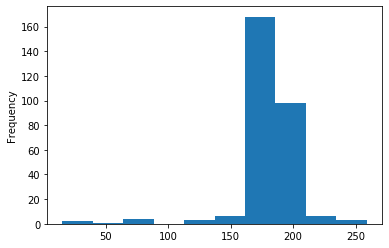

In [169]:
print(len(male_heroes))
male_heroes = male_heroes[male_heroes['Height'] < male_heroes['Height'].quantile(.99)]
print(len(male_heroes))
male_heroes[male_heroes['Height'] > 0]['Height'].plot.hist();

**Ok, much better here, we only lost 6 rows while keeping the maximum height within superhero reason!**

In [170]:
print(male_heroes['Height'].describe())

count    429.000000
mean      90.917716
std      132.436724
min      -99.000000
25%      -99.000000
50%      178.000000
75%      185.000000
max      259.000000
Name: Height, dtype: float64


**Let's see how this column changes after we interpolate the heights!**

count    429.000000
mean     181.368765
std       23.955313
min       15.200000
25%      178.000000
50%      183.000000
75%      188.000000
max      259.000000
Name: Height, dtype: float64
0


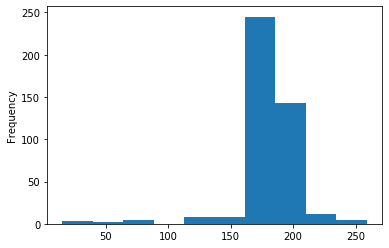

In [171]:
real_male_heights_list = male_heroes[male_heroes['Height'] > 0]['Height']

rel_male_heights_prob = real_male_heights_list.value_counts(normalize=True)

def male_height_list_fixer(height):
        if height < 0:
            return np.random.choice(rel_male_heights_prob.keys(), p=rel_male_heights_prob)
        else:
            return height

male_heroes['Height'] = male_heroes['Height'].map(lambda x: male_height_list_fixer(x))
print(male_heroes['Height'].describe())
print(male_heroes['Height'].isna().sum())
male_heroes['Height'].plot.hist();

**This seems to match out distribution from above so it looks like it worked.  I know there are other interpolation techniques out there but for now I wanted to practice this one and see what happens! I can see the downside to simply copying values in rather than rying to interpolate them on a continuous scale >.<**

In [172]:
male_heroes['Eye color'].value_counts()

blue            127
-               106
brown            97
green            26
red              20
black            14
yellow           11
white            11
grey              4
hazel             3
purple            2
gold              2
green / blue      1
blue / white      1
yellow / red      1
bown              1
amber             1
white / red       1
Name: Eye color, dtype: int64

blue            0.393189
brown           0.300310
green           0.080495
red             0.061920
black           0.043344
yellow          0.034056
white           0.034056
grey            0.012384
hazel           0.009288
gold            0.006192
purple          0.006192
bown            0.003096
yellow / red    0.003096
amber           0.003096
blue / white    0.003096
white / red     0.003096
green / blue    0.003096
Name: Eye color, dtype: float64
['blue' 'brown' 'red' 'green' 'yellow' 'black' 'white' 'grey'
 'yellow / red' 'purple' 'gold' 'blue / white' 'hazel' 'green / blue'
 'white / red' 'amber' 'bown']


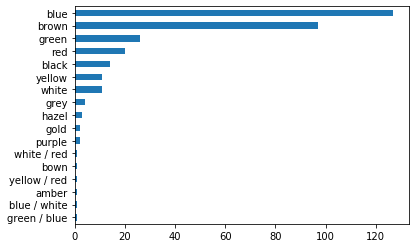

In [173]:
print(male_heroes[male_heroes['Eye color'] != '-']['Eye color'].value_counts(normalize=True))
print(male_heroes[male_heroes['Eye color'] != '-']['Eye color'].unique())
male_heroes[male_heroes['Eye color'] != '-']['Eye color'].value_counts().sort_values().plot.barh();

In [174]:
real_male_eye_color_list = male_heroes[male_heroes['Eye color'] != '-']['Eye color']
real_male_eye_color_list.value_counts(normalize=True)

blue            0.393189
brown           0.300310
green           0.080495
red             0.061920
black           0.043344
yellow          0.034056
white           0.034056
grey            0.012384
hazel           0.009288
gold            0.006192
purple          0.006192
bown            0.003096
yellow / red    0.003096
amber           0.003096
blue / white    0.003096
white / red     0.003096
green / blue    0.003096
Name: Eye color, dtype: float64

['blue' 'brown' 'black' 'red' 'green' 'yellow' 'white' 'yellow / red'
 'grey' 'purple' 'gold' 'blue / white' 'hazel' 'green / blue'
 'white / red' 'amber' 'bown']


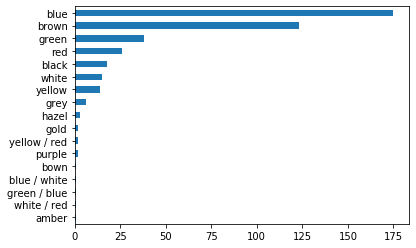

In [175]:
real_male_eye_color_list = male_heroes[male_heroes['Eye color'] != '-']['Eye color']

rel_male_eye_color_prob = real_male_eye_color_list.value_counts(normalize=True)

def male_eye_color_list_fixer(Eye_color):
        if Eye_color == '-':
            return np.random.choice(rel_male_eye_color_prob.keys(), p=rel_male_eye_color_prob)
        else:
            return Eye_color

male_heroes['Eye color'] = male_heroes['Eye color'].map(lambda x: male_eye_color_list_fixer(x))
print(male_heroes['Eye color'].unique())
male_heroes['Eye color'].value_counts().sort_values().plot.barh();

In [176]:
male_heroes['Hair color'].value_counts()

-                   107
Black                95
Brown                60
No Hair              52
Blond                49
Red                  18
White                13
Auburn                7
Green                 4
Strawberry Blond      4
Grey                  4
black                 3
Brown / White         3
Silver                2
blond                 2
Purple                1
Indigo                1
Black / Blue          1
Red / Grey            1
Yellow                1
Blue                  1
Name: Hair color, dtype: int64

Black               0.295031
Brown               0.186335
No Hair             0.161491
Blond               0.152174
Red                 0.055901
White               0.040373
Auburn              0.021739
Strawberry Blond    0.012422
Green               0.012422
Grey                0.012422
black               0.009317
Brown / White       0.009317
blond               0.006211
Silver              0.006211
Yellow              0.003106
Red / Grey          0.003106
Purple              0.003106
Indigo              0.003106
Black / Blue        0.003106
Blue                0.003106
Name: Hair color, dtype: float64
['No Hair' 'Black' 'Blond' 'Brown' 'White' 'Red' 'Auburn'
 'Strawberry Blond' 'black' 'Green' 'Brown / White' 'blond' 'Silver'
 'Red / Grey' 'Grey' 'Blue' 'Yellow' 'Indigo' 'Purple' 'Black / Blue']


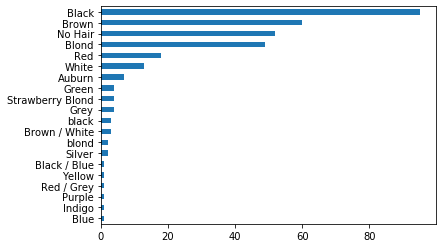

In [177]:
print(male_heroes[male_heroes['Hair color'] != '-']['Hair color'].value_counts(normalize=True))
print(male_heroes[male_heroes['Hair color'] != '-']['Hair color'].unique())
male_heroes[male_heroes['Hair color'] != '-']['Hair color'].value_counts().sort_values().plot.barh();

['No Hair' 'Black' 'Blond' 'Brown' 'White' 'Auburn' 'Red'
 'Strawberry Blond' 'black' 'Green' 'Brown / White' 'blond' 'Silver'
 'Red / Grey' 'Grey' 'Blue' 'Yellow' 'Indigo' 'Purple' 'Black / Blue']


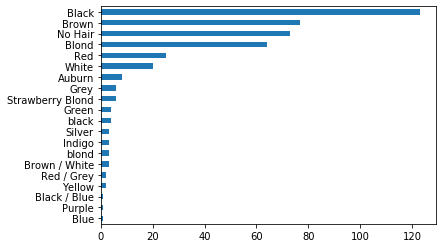

In [178]:
real_male_hair_color_list = male_heroes[male_heroes['Hair color'] != '-']['Hair color']

rel_male_hair_color_prob = real_male_hair_color_list.value_counts(normalize=True)

def male_hair_color_list_fixer(Hair_color):
        if Hair_color == '-':
            return np.random.choice(rel_male_hair_color_prob.keys(), p=rel_male_hair_color_prob)
        else:
            return Hair_color

male_heroes['Hair color'] = male_heroes['Hair color'].map(lambda x: male_hair_color_list_fixer(x))
print(male_heroes['Hair color'].unique())
male_heroes['Hair color'].value_counts().sort_values().plot.barh();

In [179]:
print(male_heroes['Height'].unique())
print(male_heroes['Weight'].unique())
print(male_heroes['Eye color'].unique())
print(male_heroes['Hair color'].unique())

[191.  185.  196.  193.  180.  178.  188.  244.  170.  257.  183.  211.
  61.  198.  213.  122.  165.  175.  173.   30.5 226.  160.  203.  201.
 168.  157.  142.  259.   79.  155.   71.   64.  137.  163.   15.2 218.
  66. ]
[ 65.  90.  81. 122. 146.  88. 104. 108. 101.  99.  72. 169.  38. 173.
  68.  83.  86. 135. 106.  63.  79.  67.  95.  77.  54. 133. 140. 113.
  71.  97. 119. 124. 155.  92.  14.  61. 158. 116.  74. 170.  70.  78.
  56.  82.  27.  91. 178. 171. 132.  89. 110.  80.  52.  45.  62.  16.
  18.   2. 128. 117.  59.  36. 131.  25.  69.  87.  17.  85.  47. 176.
 162.  76.  58.  73.  50.]
['blue' 'brown' 'black' 'red' 'green' 'yellow' 'white' 'yellow / red'
 'grey' 'purple' 'gold' 'blue / white' 'hazel' 'green / blue'
 'white / red' 'amber' 'bown']
['No Hair' 'Black' 'Blond' 'Brown' 'White' 'Auburn' 'Red'
 'Strawberry Blond' 'black' 'Green' 'Brown / White' 'blond' 'Silver'
 'Red / Grey' 'Grey' 'Blue' 'Yellow' 'Indigo' 'Purple' 'Black / Blue']


## **This all looks really good! We can now rinse and repeat for the female heroes, starting with weight!**

In [180]:
female_heroes = heroes_df[heroes_df['Gender'] == 'Female']
female_heroes

,name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
8,Agent 13,Female,blue,Blond,173.0,Marvel Comics,good,61.0
24,Angel Dust,Female,yellow,Black,165.0,Marvel Comics,good,57.0
25,Angel Salvadore,Female,brown,Black,163.0,Marvel Comics,good,54.0
26,Angela,Female,-,-,-99.0,Image Comics,bad,-99.0
38,Arachne,Female,blue,Blond,175.0,Marvel Comics,good,63.0
40,Arclight,Female,violet,Purple,173.0,Marvel Comics,bad,57.0
41,Ardina,Female,white,Orange,193.0,Marvel Comics,good,98.0
43,Ariel,Female,purple,Pink,165.0,Marvel Comics,good,59.0
44,Armor,Female,black,Black,163.0,Marvel Comics,good,50.0
51,Atom Girl,Female,black,Black,168.0,DC Comics,good,54.0


In [181]:
print(len(female_heroes['Weight'].value_counts()), '\n')
print(female_heroes['Weight'].describe(), '\n')

45 

count    196.000000
mean      27.433673
std      104.243112
min      -99.000000
25%      -99.000000
50%       54.000000
75%       61.000000
max      630.000000
Name: Weight, dtype: float64 



In [182]:
female_heroes[(female_heroes['Weight'] > 0)
            &
            (female_heroes['Weight']<= female_heroes['Weight'].quantile(.95))]['Weight'].describe()


count    129.000000
mean      62.007752
std       17.185339
min       41.000000
25%       54.000000
50%       57.000000
75%       63.000000
max      149.000000
Name: Weight, dtype: float64

**Decided to go with the 95th percentile for the female heroes as the max weight seems within reason for superheroes!**

196
186


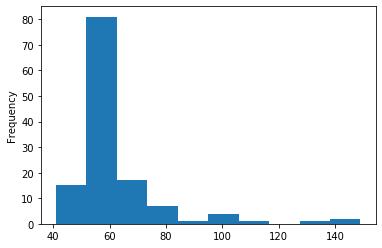

In [183]:
print(len(female_heroes))
female_heroes = female_heroes[female_heroes['Weight'] < female_heroes['Weight'].quantile(.95)]
print(len(female_heroes))
female_heroes[female_heroes['Weight'] > 0]['Weight'].plot.hist();

**This time we only lose 10 rows, not too bad!**

In [184]:
print(female_heroes['Weight'].describe())

count    186.000000
mean      12.666667
std       75.788373
min      -99.000000
25%      -99.000000
50%       54.000000
75%       59.000000
max      149.000000
Name: Weight, dtype: float64


C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


count    186.000000
mean      62.338710
std       17.072447
min       41.000000
25%       54.000000
50%       57.000000
75%       63.000000
max      149.000000
Name: Weight, dtype: float64
0


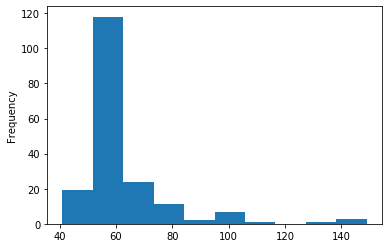

In [185]:
real_female_weights_list = female_heroes[female_heroes['Weight'] > 0]['Weight']

rel_female_weights_prob = real_female_weights_list.value_counts(normalize=True)

def female_weight_list_fixer(weight):
        if weight < 0:
            return np.random.choice(rel_female_weights_prob.keys(), p=rel_female_weights_prob)
        else:
            return weight

female_heroes['Weight'] = female_heroes['Weight'].map(lambda x: female_weight_list_fixer(x))
print(female_heroes['Weight'].describe())
print(female_heroes['Weight'].isna().sum())
female_heroes['Weight'].plot.hist();

**Onto the female height!**

In [186]:
print(len(female_heroes['Height'].value_counts()), '\n')
print(female_heroes['Height'].describe(), '\n')

18 

count    186.000000
mean      92.397849
std      124.872661
min      -99.000000
25%      -99.000000
50%      168.000000
75%      175.000000
max      297.000000
Name: Height, dtype: float64 



In [188]:
female_heroes[(female_heroes['Height'] > 0)
            &
            (female_heroes['Height']<= female_heroes['Height'].quantile(.99))]['Height'].describe()


count    129.000000
mean     171.496124
std        7.339027
min      137.000000
25%      168.000000
50%      170.000000
75%      175.000000
max      193.000000
Name: Height, dtype: float64

**Decided to go with the 99th percentile for the female heroes as the weight filter seemed to get rid of most of the outliers like it did for the male superheroes!**

186
184


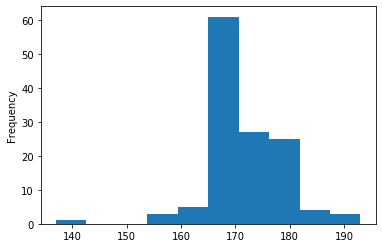

In [189]:
print(len(female_heroes))
female_heroes = female_heroes[female_heroes['Height'] < female_heroes['Height'].quantile(.99)]
print(len(female_heroes))
female_heroes[female_heroes['Height'] > 0]['Height'].plot.hist();

**Only lost 2 records!**

In [190]:
print(female_heroes['Height'].describe())

count    184.000000
mean      90.641304
std      124.317642
min      -99.000000
25%      -99.000000
50%      168.000000
75%      175.000000
max      193.000000
Name: Height, dtype: float64


count    184.000000
mean     171.315217
std        7.581873
min      137.000000
25%      168.000000
50%      170.000000
75%      175.000000
max      193.000000
Name: Height, dtype: float64
0


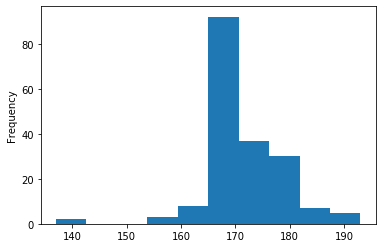

In [191]:
real_female_heights_list = female_heroes[female_heroes['Height'] > 0]['Height']

rel_female_heights_prob = real_female_heights_list.value_counts(normalize=True)

def female_height_list_fixer(height):
        if height < 0:
            return np.random.choice(rel_female_heights_prob.keys(), p=rel_female_heights_prob)
        else:
            return height

female_heroes['Height'] = female_heroes['Height'].map(lambda x: female_height_list_fixer(x))
print(female_heroes['Height'].describe())
print(female_heroes['Height'].isna().sum())
female_heroes['Height'].plot.hist();

**Female Eye color next!**

In [192]:
female_heroes['Eye color'].value_counts()

blue                       70
-                          41
green                      36
brown                      14
black                       5
red                         4
yellow                      2
white                       2
hazel                       2
violet                      2
purple                      2
indigo                      1
yellow / blue               1
amber                       1
yellow (without irises)     1
Name: Eye color, dtype: int64

blue                       0.489510
green                      0.251748
brown                      0.097902
black                      0.034965
red                        0.027972
yellow                     0.013986
hazel                      0.013986
violet                     0.013986
purple                     0.013986
white                      0.013986
indigo                     0.006993
yellow / blue              0.006993
amber                      0.006993
yellow (without irises)    0.006993
Name: Eye color, dtype: float64
['blue' 'yellow' 'brown' 'violet' 'white' 'purple' 'black' 'green' 'red'
 'yellow (without irises)' 'indigo' 'hazel' 'yellow / blue' 'amber']


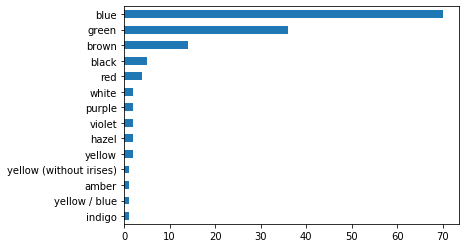

In [193]:
print(female_heroes[female_heroes['Eye color'] != '-']['Eye color'].value_counts(normalize=True))
print(female_heroes[female_heroes['Eye color'] != '-']['Eye color'].unique())
female_heroes[female_heroes['Eye color'] != '-']['Eye color'].value_counts().sort_values().plot.barh();

In [194]:
real_female_eye_color_list = female_heroes[female_heroes['Eye color'] != '-']['Eye color']
real_female_eye_color_list.value_counts(normalize=True)

blue                       0.489510
green                      0.251748
brown                      0.097902
black                      0.034965
red                        0.027972
yellow                     0.013986
hazel                      0.013986
violet                     0.013986
purple                     0.013986
white                      0.013986
indigo                     0.006993
yellow / blue              0.006993
amber                      0.006993
yellow (without irises)    0.006993
Name: Eye color, dtype: float64

['blue' 'yellow' 'brown' 'violet' 'white' 'purple' 'black' 'green' 'red'
 'amber' 'yellow (without irises)' 'indigo' 'hazel' 'yellow / blue']


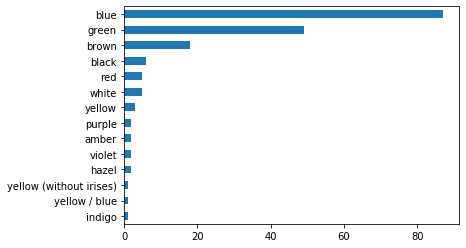

In [195]:
real_female_eye_color_list = female_heroes[female_heroes['Eye color'] != '-']['Eye color']

rel_female_eye_color_prob = real_female_eye_color_list.value_counts(normalize=True)

def female_eye_color_list_fixer(Eye_color):
        if Eye_color == '-':
            return np.random.choice(rel_female_eye_color_prob.keys(), p=rel_female_eye_color_prob)
        else:
            return Eye_color

female_heroes['Eye color'] = female_heroes['Eye color'].map(lambda x: female_eye_color_list_fixer(x))
print(female_heroes['Eye color'].unique())
female_heroes['Eye color'].value_counts().sort_values().plot.barh();

**Now finally, the last female feature!**

In [196]:
female_heroes['Hair color'].value_counts()

Black               42
Blond               40
-                   38
Red                 27
Brown               11
Auburn               4
Purple               4
White                4
Strawberry Blond     3
Green                2
Red / White          1
Red / Orange         1
Orange               1
Silver               1
Magenta              1
No Hair              1
Brown / White        1
Pink                 1
blond                1
Name: Hair color, dtype: int64

Black               0.287671
Blond               0.273973
Red                 0.184932
Brown               0.075342
Purple              0.027397
White               0.027397
Auburn              0.027397
Strawberry Blond    0.020548
Green               0.013699
Orange              0.006849
Red / White         0.006849
blond               0.006849
Red / Orange        0.006849
Silver              0.006849
No Hair             0.006849
Magenta             0.006849
Pink                0.006849
Brown / White       0.006849
Name: Hair color, dtype: float64
['Blond' 'Black' 'Purple' 'Orange' 'Pink' 'Red' 'Auburn' 'Magenta' 'Brown'
 'White' 'Green' 'Red / Orange' 'No Hair' 'blond' 'Brown / White'
 'Strawberry Blond' 'Red / White' 'Silver']


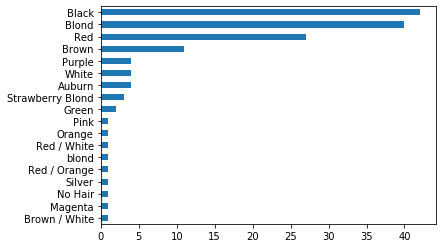

In [197]:
print(female_heroes[female_heroes['Hair color'] != '-']['Hair color'].value_counts(normalize=True))
print(female_heroes[female_heroes['Hair color'] != '-']['Hair color'].unique())
female_heroes[female_heroes['Hair color'] != '-']['Hair color'].value_counts().sort_values().plot.barh();

['Blond' 'Black' 'Purple' 'Orange' 'Pink' 'Brown' 'Red' 'Auburn' 'Magenta'
 'Green' 'White' 'Red / Orange' 'No Hair' 'blond' 'Brown / White'
 'Strawberry Blond' 'Red / White' 'Silver']


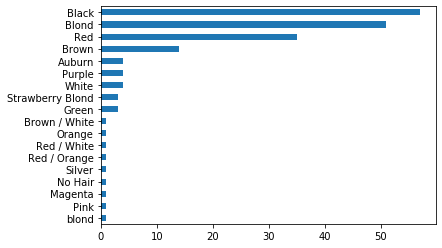

In [199]:
real_female_hair_color_list = female_heroes[female_heroes['Hair color'] != '-']['Hair color']

rel_female_hair_color_prob = real_female_hair_color_list.value_counts(normalize=True)

def female_hair_color_list_fixer(Hair_color):
        if Hair_color == '-':
            return np.random.choice(rel_female_hair_color_prob.keys(), p=rel_female_hair_color_prob)
        else:
            return Hair_color

female_heroes['Hair color'] = female_heroes['Hair color'].map(lambda x: female_hair_color_list_fixer(x))
print(female_heroes['Hair color'].unique())
female_heroes['Hair color'].value_counts().sort_values().plot.barh();

In [200]:
print(female_heroes['Height'].unique())
print(female_heroes['Weight'].unique())
print(female_heroes['Eye color'].unique())
print(female_heroes['Hair color'].unique())

[173. 165. 163. 175. 193. 168. 180. 178. 188. 170. 157. 183. 137. 185.
 155.]
[ 61.  57.  54.  63.  98.  59.  50.  58.  52. 135.  56.  68. 149.  55.
  74.  72.  67.  65.  77. 115.  71.  48. 105.  83.  49.  85. 101.  81.
  70.  62. 143.  41.  51.]
['blue' 'yellow' 'brown' 'violet' 'white' 'purple' 'black' 'green' 'red'
 'amber' 'yellow (without irises)' 'indigo' 'hazel' 'yellow / blue']
['Blond' 'Black' 'Purple' 'Orange' 'Pink' 'Brown' 'Red' 'Auburn' 'Magenta'
 'Green' 'White' 'Red / Orange' 'No Hair' 'blond' 'Brown / White'
 'Strawberry Blond' 'Red / White' 'Silver']


In [203]:
female_heroes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 8 to 732
Data columns (total 8 columns):
name          184 non-null object
Gender        184 non-null object
Eye color     184 non-null object
Hair color    184 non-null object
Height        184 non-null float64
Publisher     184 non-null object
Alignment     184 non-null object
Weight        184 non-null float64
dtypes: float64(2), object(6)
memory usage: 12.9+ KB


In [205]:
male_heroes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 1 to 733
Data columns (total 8 columns):
name          429 non-null object
Gender        429 non-null object
Eye color     429 non-null object
Hair color    429 non-null object
Height        429 non-null float64
Publisher     429 non-null object
Alignment     429 non-null object
Weight        429 non-null float64
dtypes: float64(2), object(6)
memory usage: 30.2+ KB


In [226]:
powers_df = pd.read_csv('super_hero_powers.csv')

In [239]:
powers_df.rename(columns = {'hero_names' : 'name'}, inplace=True)
powers_df

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [240]:
updated_heroes_df = pd.concat([male_heroes, female_heroes])
# (female_heroes, how='outer')
updated_heroes_df = updated_heroes_df.sort_values(by='name')
updated_heroes_df

,name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
1,Abe Sapien,Male,blue,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,No Hair,185.0,DC Comics,good,90.0
4,Abraxas,Male,blue,Black,196.0,Marvel Comics,bad,81.0
5,Absorbing Man,Male,blue,No Hair,193.0,Marvel Comics,bad,122.0
6,Adam Monroe,Male,blue,Blond,180.0,NBC - Heroes,good,146.0
...,...,...,...,...,...,...,...,...
728,Yellowjacket,Male,blue,Blond,183.0,Marvel Comics,good,83.0
729,Yellowjacket II,Female,blue,Strawberry Blond,165.0,Marvel Comics,good,52.0
731,Yoda,Male,brown,White,66.0,George Lucas,good,17.0
732,Zatanna,Female,blue,Black,170.0,DC Comics,good,57.0


## This looks great! Now let's move onto the next section!

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [242]:
complete_heroes_df = updated_heroes_df.merge(powers_df, on='name', how='inner')
complete_heroes_df

,name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,Abe Sapien,Male,blue,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abin Sur,Male,blue,No Hair,185.0,DC Comics,good,90.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

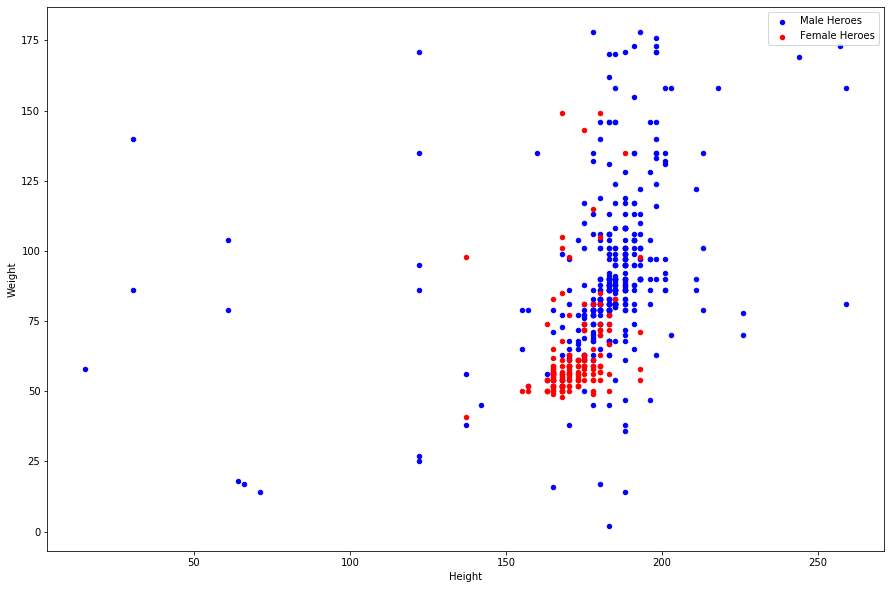

In [256]:
male_heroes_complete = complete_heroes_df[complete_heroes_df['Gender'] == 'Male']

female_heroes_complete = complete_heroes_df[complete_heroes_df['Gender'] == 'Female']


ax = male_heroes_complete.plot.scatter(x='Height', y='Weight', color='blue', label='Male Heroes');

female_heroes_complete.plot.scatter(x='Height', y='Weight', color='red', ax=ax, label='Female Heroes', figsize=(15,10));

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [261]:
male_heroes_df = male_heroes_complete
female_heroes_df = female_heroes_complete

def show_distplot(dataframe, gender, column_name):
    plt.plot();
    dataframe[column_name].hist();
    plt.title('Distribution of {} for {} heroes!'.format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel('Probablility Density')
    plt.show();

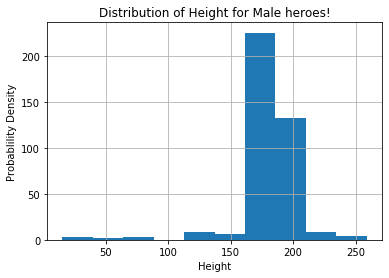

In [262]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')

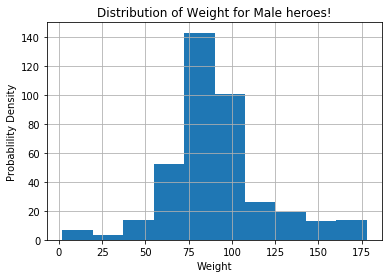

In [264]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')

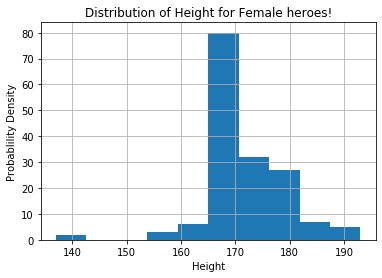

In [266]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')

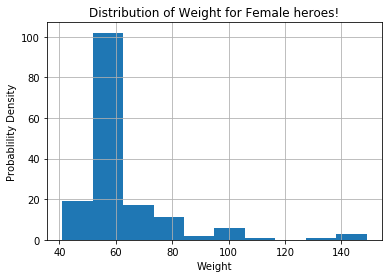

In [267]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________
## All Heroes

**Both the male and female heroes 'Height' distribution looks very left-skewed even after I adjusted the mising data.  This is interesting though not at all unexpected when working with a dataset of this nature.  Superheroes come in all shapes and sizes, and the smaller ones still tend to pack a real punch!**

# Male Heroes

**The male heroes 'Weight' distribution is muh more normalized than the 'Height' however, making me think that further investigation into the composition of the matter that makes up these superheroes would be of ineterest to those who wish to study this dataset.  If you are only a few feet tall but you are made of metal or rocks then it is easy to see how these two distributons may line up together**

## Female Heroes

**The female heroes 'Weight distribution is less normalized than the males, very right-skewed.  This is interesting as this may indicate something unique about female superheroes at the extreme ends of weight distribution.  Perhaps there is a non-linear relationship between height and weight for female heroes after a certain threshold is crossed?**

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [307]:
complete_heroes_df.apply(pd.value_counts)

,name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352.0,419.0,544.0,537.0,522.0,362.0,442.0,492.0,372.0,530.0,537.0,442.0,459.0,548.0,536.0,469.0,425.0,282.0,538.0,477.0,547.0,428.0,540.0,512.0,541.0,329.0,552.0,547.0,549.0,553.0,354.0,549.0,519.0,503.0,535.0,546.0,551.0,499.0,483.0,504.0,523.0,526.0,553.0,505.0,550.0,537.0,551.0,500.0,524.0,507.0,538.0,549.0,526.0,532.0,553.0,529.0,552.0,551.0,533.0,417.0,473.0,519.0,481.0,527.0,553.0,538.0,550.0,550.0,511.0,545.0,540.0,549.0,535.0,551.0,551.0,550.0,536.0,537.0,541.0,544.0,495.0,553.0,549.0,531.0,547.0,530.0,537.0,536.0,520.0,534.0,551.0,545.0,529.0,543.0,548.0,544.0,533.0,540.0,552.0,533.0,548.0,553.0,513.0,527.0,516.0,528.0,530.0,522.0,553.0,553.0,552.0,552.0,548.0,553.0,549.0,553.0,541.0,548.0,515.0,524.0,553.0,549.0,525.0,552.0,540.0,552.0,547.0,545.0,548.0,550.0,548.0,540.0,547.0,548.0,536.0,538.0,551.0,553.0,538.0,552.0,551.0,537.0,528.0,525.0,535.0,552.0,548.0,549.0,547.0,552.0,538.0,553.0,549.0,552.0,550.0,534.0,536.0,543.0,546.0,554.0,549.0,553.0,553.0,553.0,553.0,554.0,554.0
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0,135.0,10.0,17.0,32.0,192.0,112.0,62.0,182.0,24.0,17.0,112.0,95.0,6.0,18.0,85.0,129.0,272.0,16.0,77.0,7.0,126.0,14.0,42.0,13.0,225.0,2.0,7.0,5.0,1.0,200.0,5.0,35.0,51.0,19.0,8.0,3.0,55.0,71.0,50.0,31.0,28.0,1.0,49.0,4.0,17.0,3.0,54.0,30.0,47.0,16.0,5.0,28.0,22.0,1.0,25.0,2.0,3.0,21.0,137.0,81.0,35.0,73.0,27.0,1.0,16.0,4.0,4.0,43.0,9.0,14.0,5.0,19.0,3.0,3.0,4.0,18.0,17.0,13.0,10.0,59.0,1.0,5.0,23.0,7.0

In [311]:
complete_heroes_df.apply(pd.value_counts).iloc[1].sort_values(ascending=False)

Super Strength                  272.0
Stamina                         225.0
Agility                         202.0
Super Speed                     200.0
Durability                      192.0
Flight                          182.0
Reflexes                        137.0
Accelerated Healing             135.0
Intelligence                    129.0
Energy Blasts                   126.0
Marksmanship                    112.0
Stealth                         112.0
Weapons Master                   95.0
Longevity                        85.0
Invulnerability                  81.0
Telepathy                        77.0
Force Fields                     73.0
Enhanced Senses                  71.0
Energy Absorption                62.0
Enhanced Hearing                 59.0
Teleportation                    55.0
Shapeshifting                    54.0
Weapon-based Powers              51.0
Telekinesis                      50.0
Jump                             49.0
Immortality                      47.0
Psionic Powe

**As we can see above, the top 5 Superpowers overall are:**

1. Super Strength
2. Stamina
3. Agility
4. Super Speed
5. Durability

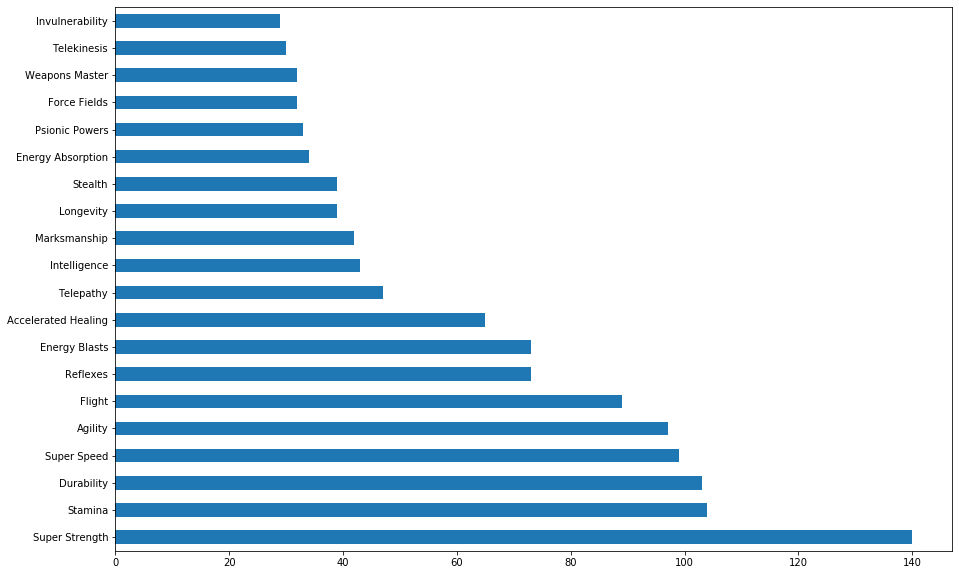

In [332]:
Marvel_top_powers = complete_heroes_df[complete_heroes_df['Publisher'] == 'Marvel Comics'].apply(pd.value_counts).iloc[1].sort_values(ascending=False)
Marvel_top_powers[:20].plot.barh(figsize=(15,10));

In [313]:
complete_heroes_df[complete_heroes_df['Publisher'] == 'Marvel Comics'].apply(pd.value_counts).iloc[1].sort_values(ascending=False)

Super Strength                  140.0
Stamina                         104.0
Durability                      103.0
Super Speed                      99.0
Agility                          97.0
Flight                           89.0
Reflexes                         73.0
Energy Blasts                    73.0
Accelerated Healing              65.0
Telepathy                        47.0
Intelligence                     43.0
Marksmanship                     42.0
Longevity                        39.0
Stealth                          39.0
Energy Absorption                34.0
Psionic Powers                   33.0
Force Fields                     32.0
Weapons Master                   32.0
Telekinesis                      30.0
Invulnerability                  29.0
Teleportation                    29.0
Enhanced Senses                  29.0
Shapeshifting                    27.0
Natural Weapons                  25.0
Molecular Manipulation           25.0
Weapon-based Powers              25.0
Animal Orien

**As we can see above, the top 5 Marvel Comics Superpowers are:**

1. Super Strength
2. Stamina
3. Durability
4. Super Speed
5. Agility

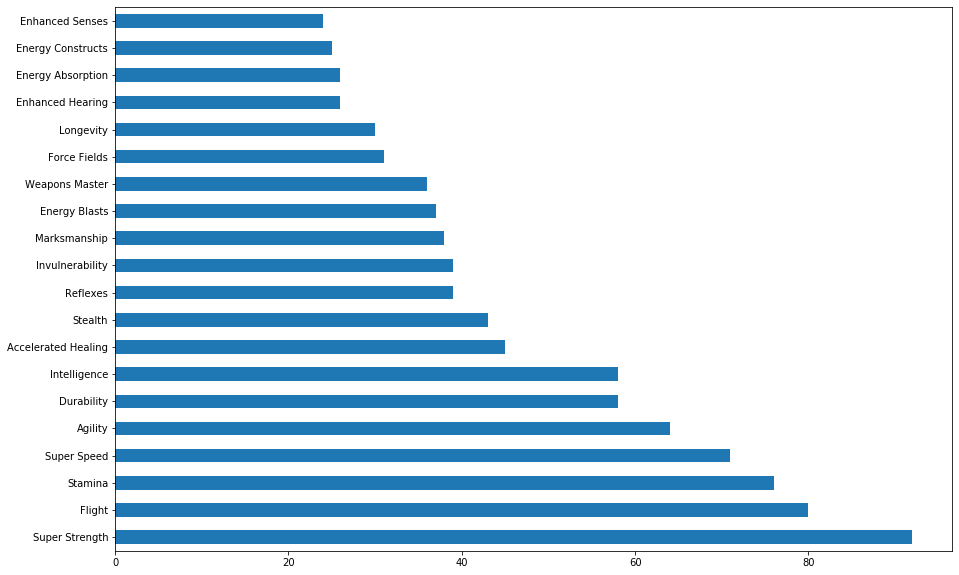

In [331]:
DC_top_powers = complete_heroes_df[complete_heroes_df['Publisher'] == 'DC Comics'].apply(pd.value_counts).iloc[1].sort_values(ascending=False)
DC_top_powers[:20].plot.barh(figsize=(15,10));

In [314]:
complete_heroes_df[complete_heroes_df['Publisher'] == 'DC Comics'].apply(pd.value_counts).iloc[1].sort_values(ascending=False)

Super Strength                  92.0
Flight                          80.0
Stamina                         76.0
Super Speed                     71.0
Agility                         64.0
Durability                      58.0
Intelligence                    58.0
Accelerated Healing             45.0
Stealth                         43.0
Reflexes                        39.0
Invulnerability                 39.0
Marksmanship                    38.0
Energy Blasts                   37.0
Weapons Master                  36.0
Force Fields                    31.0
Longevity                       30.0
Enhanced Hearing                26.0
Energy Absorption               26.0
Energy Constructs               25.0
Enhanced Senses                 24.0
Phasing                         18.0
Size Changing                   18.0
Weapon-based Powers             18.0
Vision - X-Ray                  18.0
Vision - Telescopic             17.0
Shapeshifting                   17.0
Teleportation                   17.0
T

**As we can see above, the top 5 DC Comics Superpowers are:**

1. Super Strength
2. Flight
3. Stamina
4. Super Speed
5. Agility

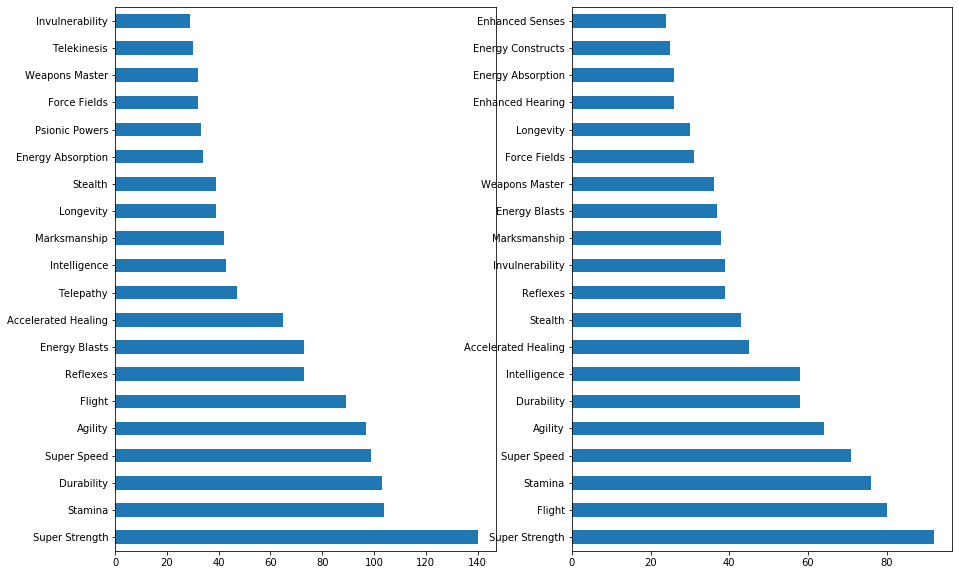

In [346]:
fig = plt.figure(figsize=(15,15))
                 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

Marvel_top_powers[:20].plot.barh(figsize=(15,10), ax=ax1);
DC_top_powers[:20].plot.barh(figsize=(15,10), ax=ax2);

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________
**The Top 5 superpowers are very closely related as would be expected from two organizations that are probably inspiring eachother thorughout their lifetime.  Both of these companies clearly value having Super Strength as the top power which makes sense considering that it is such a universal skill that can be applied in almost any situation. There is a slight favour for DC comics to have superheroes with flight, whereas Marvel seems to favour durability.  I would say that these findings are not very surprising overall, though they are interesting and worth noting.**

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data